
# 数值模式的验证

950.4955


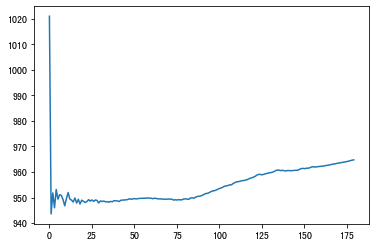

In [19]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
filepath = "/media/liyuan3970/Data/demo4_run2/"
ncfile =Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")


# Get the sea level pressure
w = getvar(ncfile, "slp", timeidx=88)
#w
#print(w.min)
data = w.data
print(data.min())


slp_value = []
for i in range(180):
    slp = getvar(ncfile, "slp", timeidx=i)
    slp_min = slp.data.min()
    slp_value.append(slp_min)

import matplotlib.pyplot as plt
plt.plot(slp_value)

In [23]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
filepath = "/media/liyuan3970/Data/demo4_run2/"
ncfile =Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")


# Get the sea level pressure
w = getvar(ncfile, "slp", timeidx=60)
#w
#print(w.min)
data = w.data
print(data.min())
w = getvar(ncfile, "slp", timeidx=75)
#w
#print(w.min)
data = w.data
print(data.min())
w = getvar(ncfile, "slp", timeidx=100)
#w
#print(w.min)
data = w.data
print(data.min())

949.70074
949.03784
953.5566


In [28]:
import numpy as np
print(slp_value)

data_slp = np.array(slp_value)
np.savetxt("result.txt", data_slp)

[1021.01385, 943.5904, 951.81506, 945.9988, 953.1656, 949.3628, 951.1207, 950.8404, 949.2391, 946.7566, 949.5914, 951.966, 949.4611, 948.9812, 948.2478, 949.8251, 947.8306, 949.3391, 947.4777, 948.9883, 948.531, 948.07684, 948.39825, 949.17664, 948.6099, 949.0755, 948.5017, 949.0533, 948.87665, 947.8699, 948.6849, 948.46045, 948.6318, 948.32294, 948.39264, 948.2053, 948.4721, 948.3547, 948.804, 948.71185, 948.695, 948.4315, 948.9392, 948.97986, 949.04755, 949.10474, 949.19965, 949.5136, 949.33655, 949.4566, 949.5997, 949.45404, 949.5752, 949.6763, 949.6789, 949.7187, 949.76434, 949.8118, 949.8265, 949.7611, 949.70074, 949.5493, 949.7727, 949.5803, 949.5167, 949.43726, 949.47253, 949.3602, 949.3755, 949.33746, 949.4274, 949.3654, 949.36194, 949.0155, 949.13104, 949.03784, 949.17883, 949.09, 949.1289, 949.4694, 949.4807, 949.41406, 949.30725, 949.84735, 949.9048, 949.731, 950.1811, 950.41785, 950.4955, 950.6222, 950.90497, 951.25165, 951.60333, 951.64166, 951.953, 952.3255, 952.574, 952.

<xarray.DataArray 'slp' (south_north: 159, west_east: 168)>
array([[992.29047, 992.2535 , 992.2901 , ..., 983.2908 , 983.4813 ,
        983.6597 ],
       [992.40137, 992.39276, 992.3726 , ..., 983.2017 , 983.39166,
        983.5696 ],
       [992.5616 , 992.51483, 992.45374, ..., 983.112  , 983.3037 ,
        983.489  ],
       ...,
       [998.1087 , 998.1158 , 998.07   , ..., 996.9798 , 997.0184 ,
        997.06335],
       [998.1917 , 998.17865, 998.13513, ..., 997.081  , 997.1209 ,
        997.1587 ],
       [998.2721 , 998.23535, 998.2102 , ..., 997.1858 , 997.2173 ,
        997.25433]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 118.36749 118.3978 ... 123.52594
    XLAT     (south_north, west_east) float32 27.1268 27.127438 ... 31.39713
    XTIME    float32 600.0
    Time     datetime64[ns] 2019-08-09T16:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    description:  sea level pr

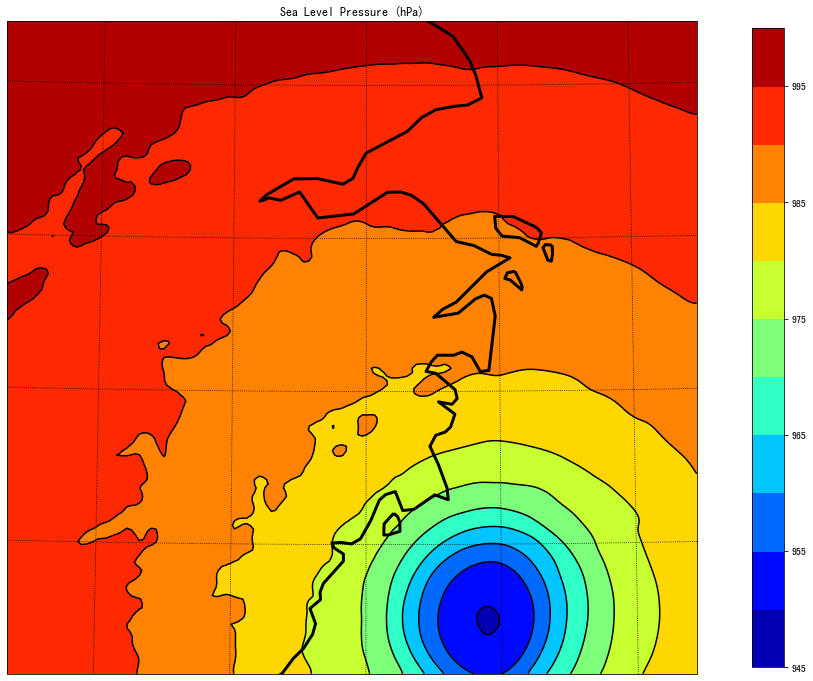

In [25]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
filepath = "/media/liyuan3970/Data/demo4_run2/"
ncfile =Dataset(filepath+"wrfout_d02_2019-08-09_06:00:00.nc")


# Get the sea level pressure
w = getvar(ncfile, "slp", timeidx=60)
print(w)

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_w = smooth2d(w, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(w)

# Get the cartopy mapping object
cart_proj = get_cartopy(w)

# Create a figure
fig = plt.figure(figsize=(20,12))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=3.0)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
plt.contour(to_np(lons), to_np(lats), to_np(smooth_w), 10, colors="black",
            transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_w), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_w))
ax.set_ylim(cartopy_ylim(smooth_w))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")

plt.show()